In [130]:
import numpy as np
import pandas as pd

In [131]:
# import sys
# !{sys.executable} -m pip install plotly

## Importing Main Data from track_analysis
* results contains a lot of information, but we are particularly interested in the items feature as it contains song information
* We will use track_analysis and results to create our 3 main DataFrames

In [132]:
from top_tracks import results, track_analysis

In [133]:
analysis = pd.DataFrame.from_dict(track_analysis)
items = pd.DataFrame.from_records(pd.DataFrame.from_records(results)["items"])

## Creating our main DataFrames
* **Attributes** - Features: (danceability, energy, acousticness, valence, mode, key, loudness)
* **tracks** - Features: (name, href, id, uri)
* **norm_df** - Features: Same as attributes, values have been normalized for Radar Graph Visualization

In [134]:
items = items[["name", "href", "id", "uri"]]
tracks["uri"] = items["uri"].apply(lambda s: s.split(":")[2])

In [135]:
attributes = analysis[["danceability", "energy", "acousticness", "valence", "mode", "key", "loudness"]]

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaler.fit(attributes)

StandardScaler()

In [139]:
transform = scaler.transform(attributes)

In [140]:
norm_df = pd.DataFrame.from_records(transform)

In [141]:
attributes["name"] = tracks["name"]

<ipython-input-141-6ca61b1f9b84>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
tracks.head()

,name,href,id,uri
0,Bloques,https://api.spotify.com/v1/tracks/1KA12CcrewBM...,1KA12CcrewBMjcMBq07SI7,1KA12CcrewBMjcMBq07SI7
1,Flat Earth,https://api.spotify.com/v1/tracks/2mlh8fBK1wFP...,2mlh8fBK1wFPW5PgHYCjbN,2mlh8fBK1wFPW5PgHYCjbN
2,Bleed Me an Ocean,https://api.spotify.com/v1/tracks/5PQobJZwHbbU...,5PQobJZwHbbUWL4qzGbBV0,5PQobJZwHbbUWL4qzGbBV0
3,1x1 (feat. Nova Twins),https://api.spotify.com/v1/tracks/6sIbv1oWOuma...,6sIbv1oWOuma2qV907MUbk,6sIbv1oWOuma2qV907MUbk
4,Little Dreamer - 2015 Remaster,https://api.spotify.com/v1/tracks/0AiUx0SP4HK1...,0AiUx0SP4HK1DJPwi20cEn,0AiUx0SP4HK1DJPwi20cEn


In [143]:
attributes.head()

,danceability,energy,acousticness,valence,mode,key,loudness,name
0,0.723,0.745,0.010000,0.478,0,8,-4.584,Bloques
1,0.463,0.766,0.004480,0.359,1,1,-3.653,Flat Earth
2,0.400,0.745,0.000004,0.224,1,7,-11.085,Bleed Me an Ocean
3,0.452,0.937,0.000209,0.604,0,1,-3.346,1x1 (feat. Nova Twins)
4,0.382,0.811,0.024000,0.733,0,11,-6.191,Little Dreamer - 2015 Remaster


In [144]:
norm_df.head()

,0,1,2,3,4,5,6
0,1.611253,-0.541745,-0.298037,0.597656,-1.393261,0.851090,0.390166
1,0.060250,-0.419783,-0.330541,0.049947,0.717741,-1.108657,0.728004
2,-0.315569,-0.541745,-0.356895,-0.571403,0.717741,0.571126,-1.968900
3,-0.005369,0.573339,-0.355690,1.177582,-1.393261,-1.108657,0.839408
4,-0.422946,-0.158435,-0.215600,1.771317,-1.393261,1.690981,-0.192978


In [145]:
import plotly.graph_objects as go

In [146]:
fig = go.Figure()

for num in range(0, 5):
    fig.add_trace(go.Scatterpolar(
          r=norm_df.iloc[num].values,
          theta=attributes.columns,
          fill='toself',
          name=attributes.iloc[num]["name"]
    ))
    
    
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-3.5, 3.5]
    )),
  showlegend=True
)

fig.show()

In [147]:
temp = norm_df[[1, 2, 3]]

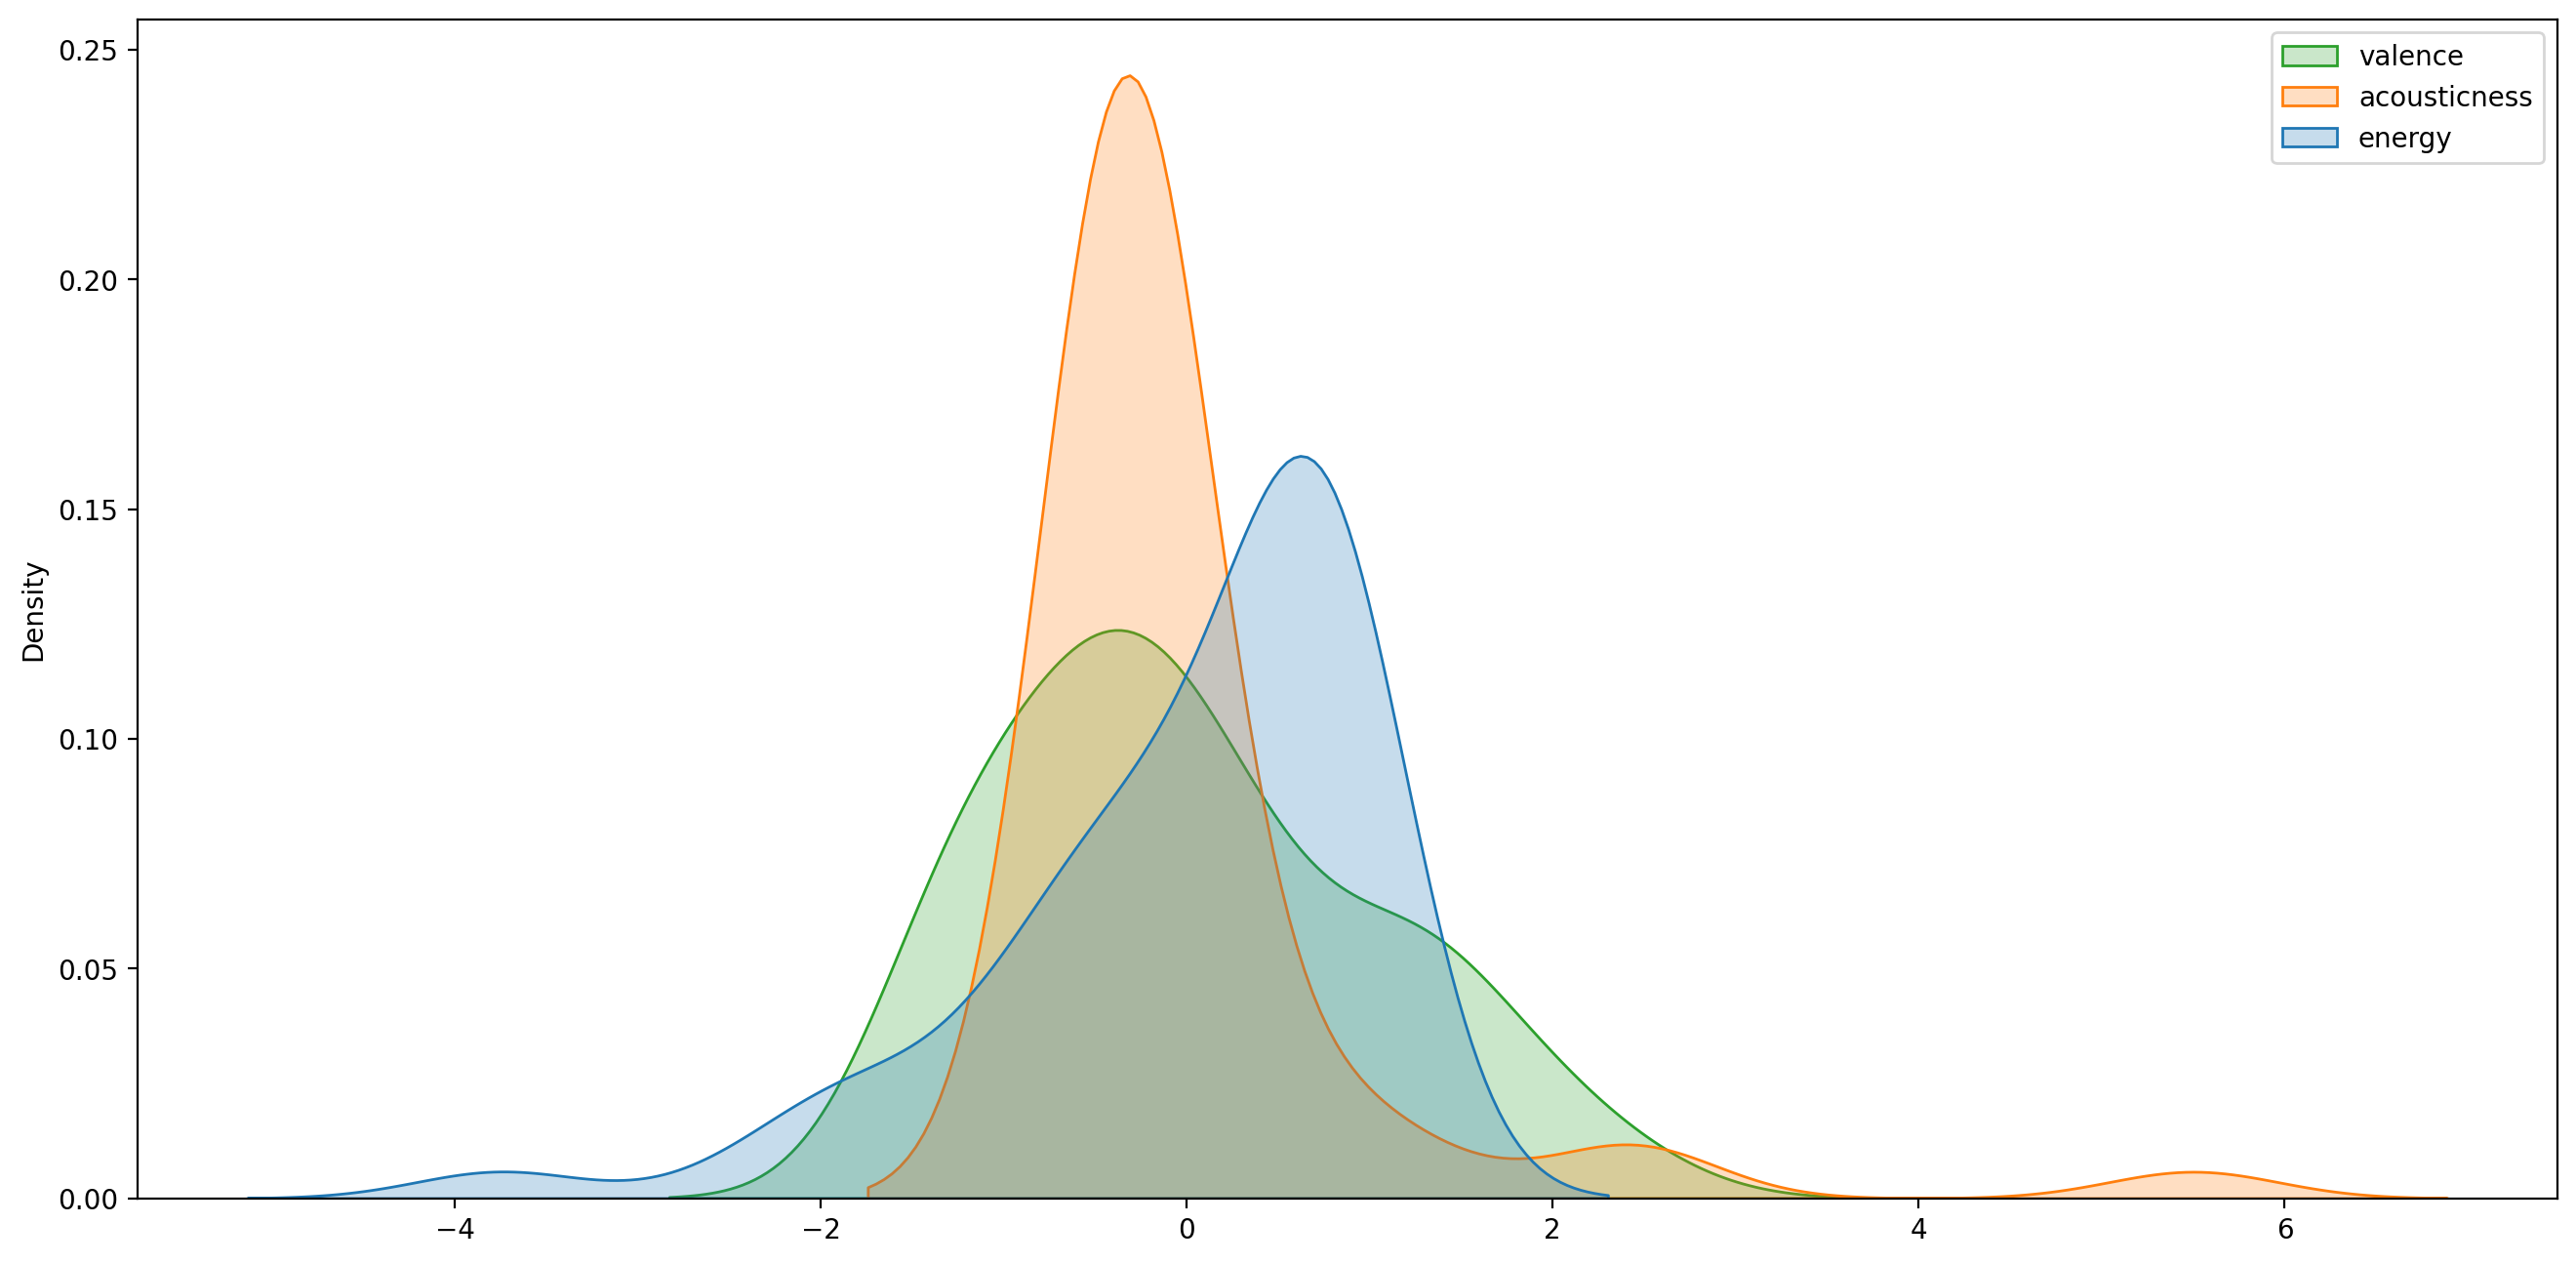

In [148]:
plt.figure(figsize=(16, 8), dpi=200)
kdeplot = sns.kdeplot(data=temp, shade=True)
plt.legend(["valence", "acousticness", "energy"])

plt.show();

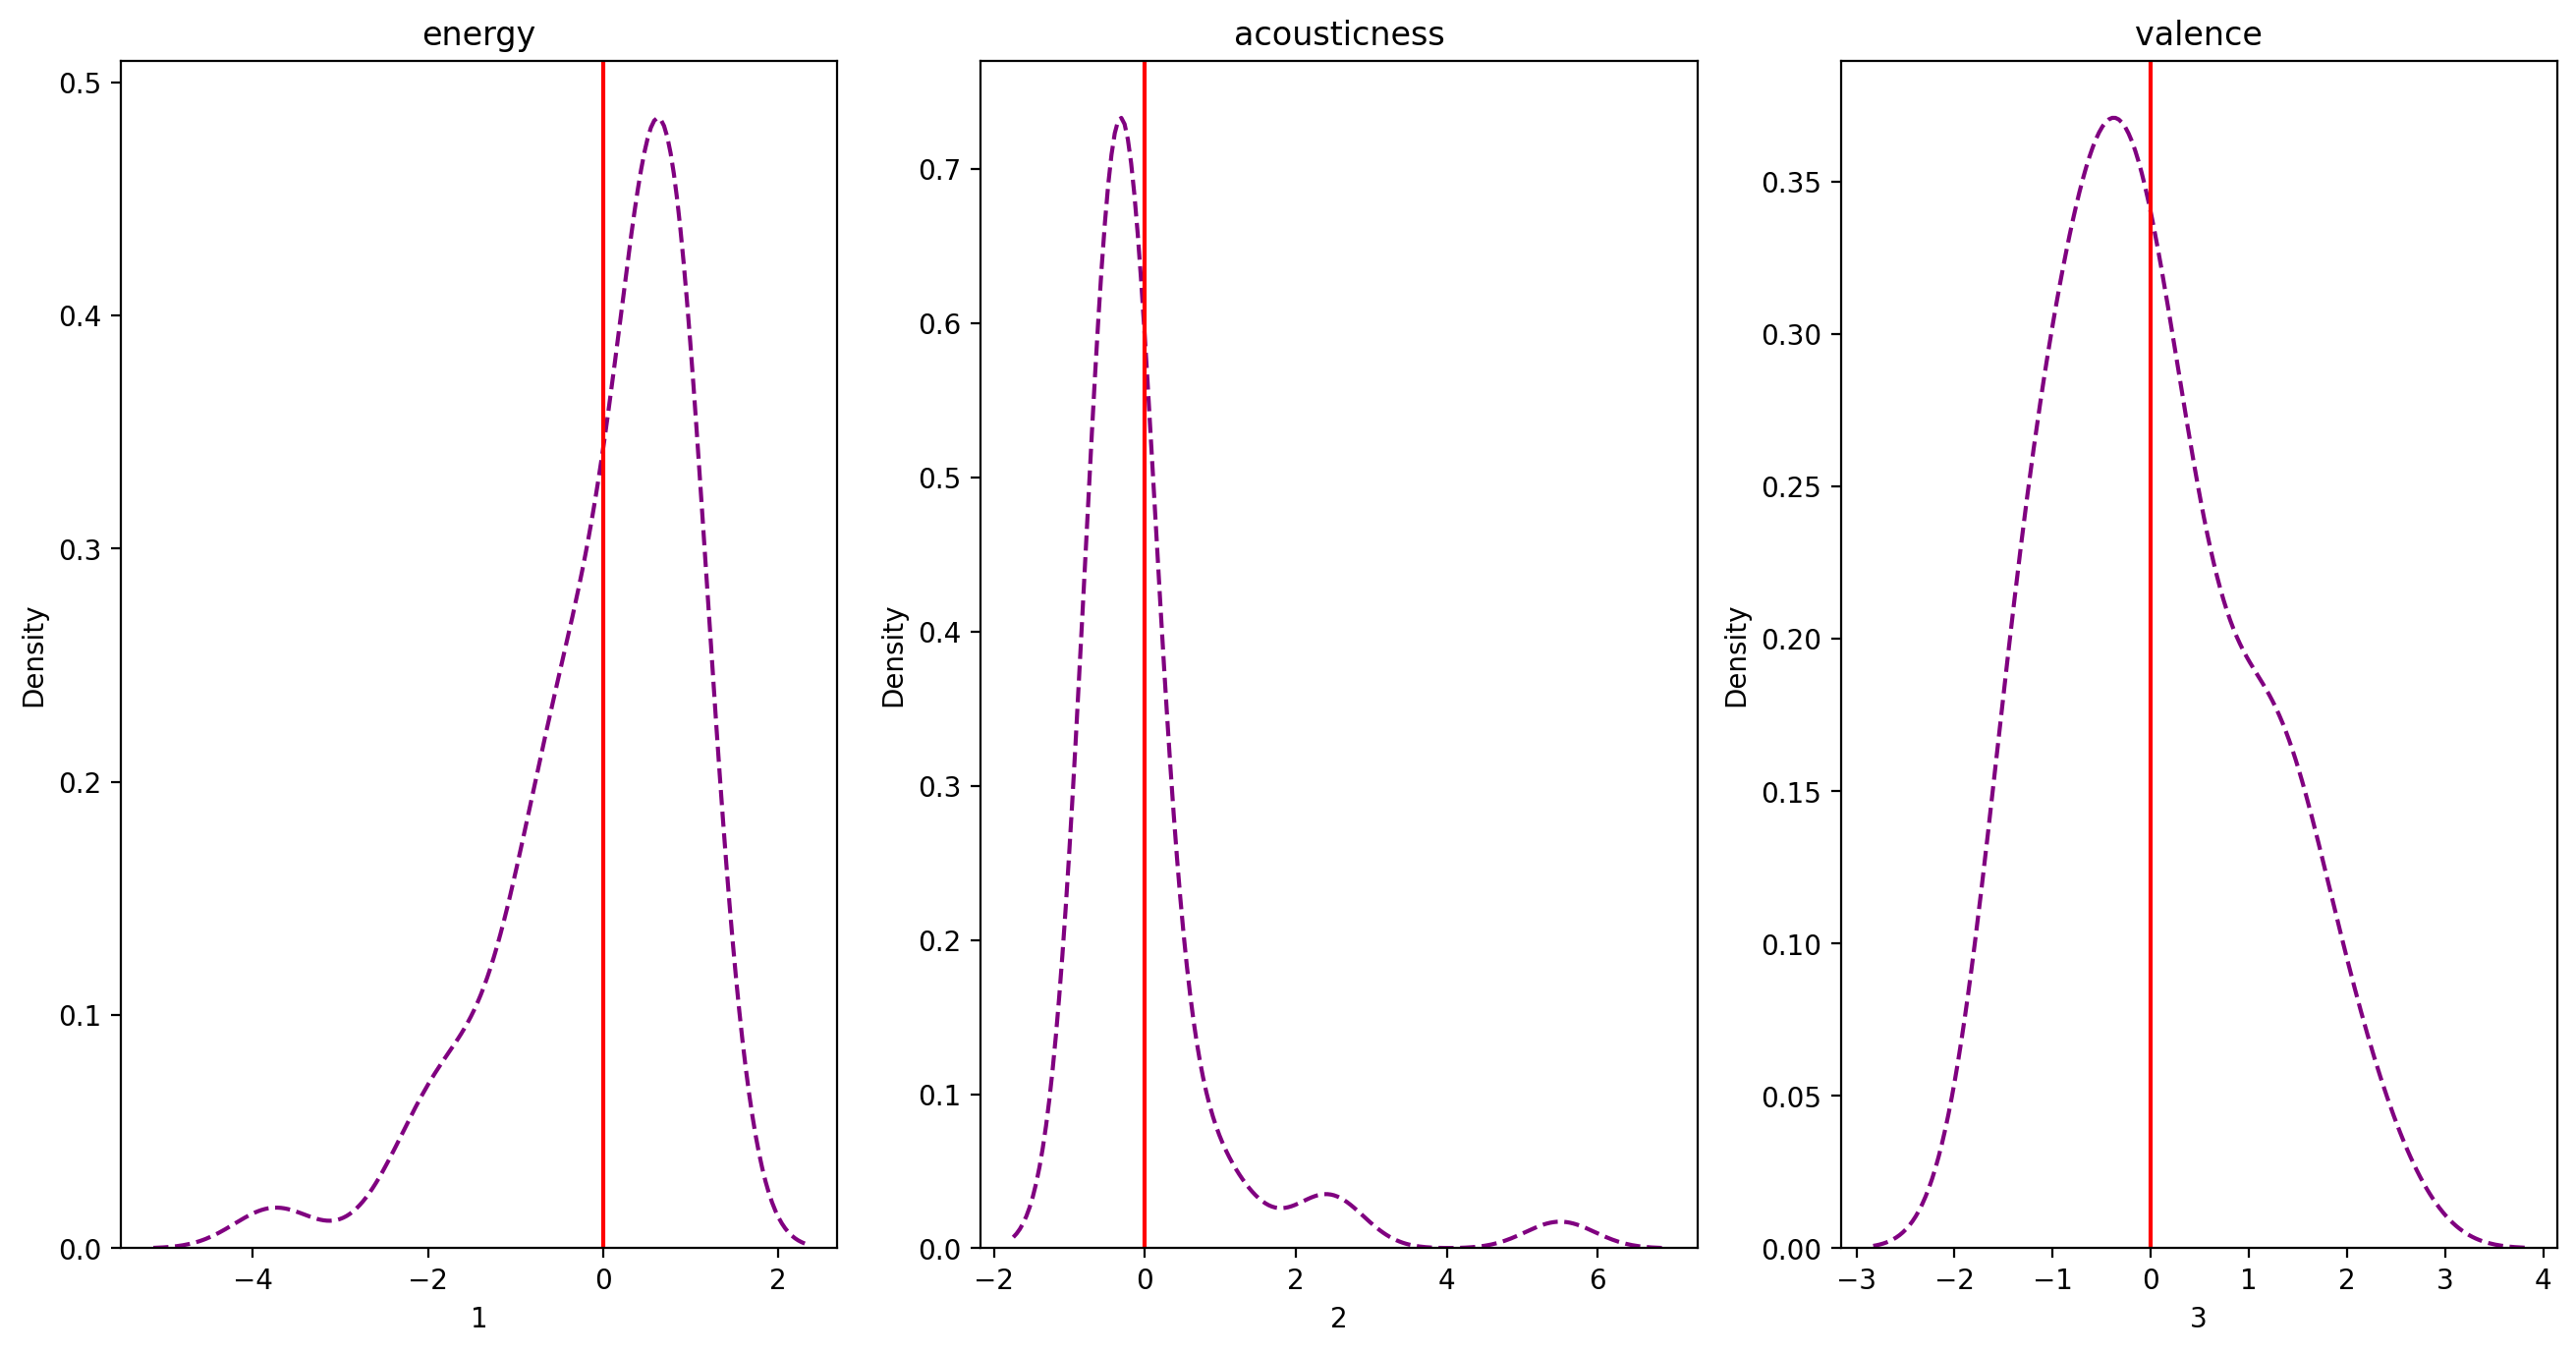

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), dpi=200)

for num in range(1, 4):
    sns.kdeplot(x=temp[num], data=temp, c='purple', ls='--', ax=ax[num - 1])
    ax[num - 1].set_title(attributes.columns[num])
    ax[num - 1].axvline(x=temp[num].mean(), c='red')

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

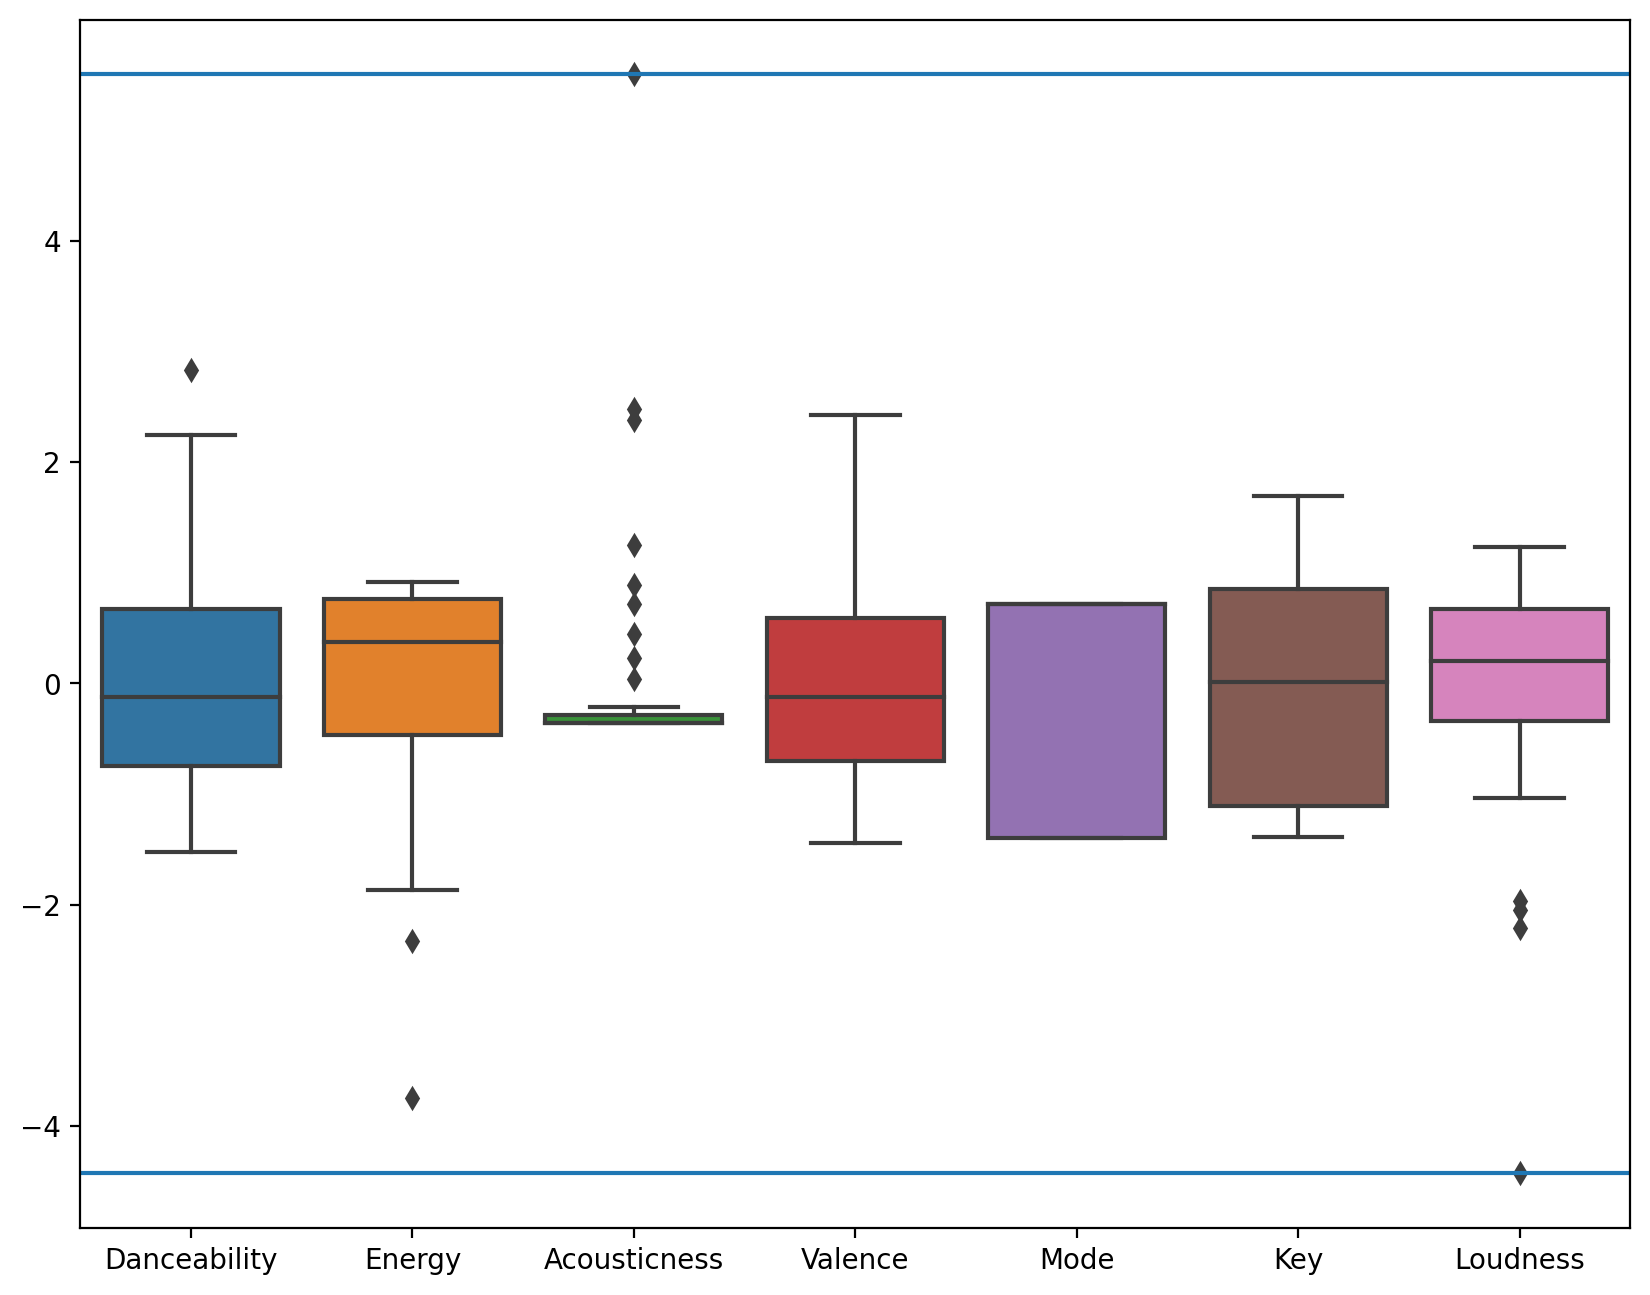

In [151]:
plt.figure(figsize=(10, 8), dpi=200)


boxplots = sns.boxplot(data=norm_df)
boxplots.set_xticklabels([s.title() for s in d.keys() if s != "name"])

plt.axhline(y=norm_df[d["acousticness"]].values.max())
plt.axhline(y=norm_df[d["loudness"]].values.min())


plt.show()

In [152]:
from top_tracks import sp

In [153]:
# for entry in range(0, len(tracks)):
#     track = tracks.iloc[entry]
#     analysis = sp.audio_analysis(track["uri"])
    
#     print(analysis)

In [154]:
attributes.sort_values(by="danceability", ascending=False).head()

,danceability,energy,acousticness,valence,mode,key,loudness,name
46,0.928,0.517,0.06790,0.616,1,1,-6.489,The Hop
24,0.829,0.527,0.48200,0.475,0,6,-6.644,Kevin’s Heart
0,0.723,0.745,0.01000,0.478,0,8,-4.584,Bloques
33,0.719,0.996,0.00342,0.140,1,1,-2.757,Keyboard
44,0.695,0.944,0.01220,0.655,1,1,-4.776,Lacquer Head
